<a href="https://colab.research.google.com/github/vhiotirta22/QuizPCD/blob/main/Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving avatar.png to avatar (2).png


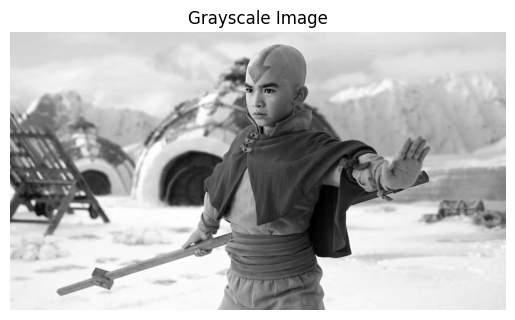

In [11]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Meminta pengguna untuk mengunggah gambar
uploaded = files.upload()

# Mengambil nama file gambar yang diunggah
file_name = next(iter(uploaded))

# Membaca gambar
image = cv2.imread(file_name)

# Konversi gambar ke dalam skala abu-abu
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar hasil konversi
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()


In [12]:
# Mendapatkan dimensi gambar
tinggi, lebar = gray_image.shape

print("Dimensi gambar:")
print("Lebar:", lebar)
print("Tinggi:", tinggi)


Dimensi gambar:
Lebar: 700
Tinggi: 392


In [13]:
# Cari nilai maksimum dan nilai minimum pixel
nilai_min = gray_image.min()
nilai_max = gray_image.max()

print("Nilai minimum pixel:", nilai_min)
print("Nilai maksimum pixel:", nilai_max)


Nilai minimum pixel: 0
Nilai maksimum pixel: 255


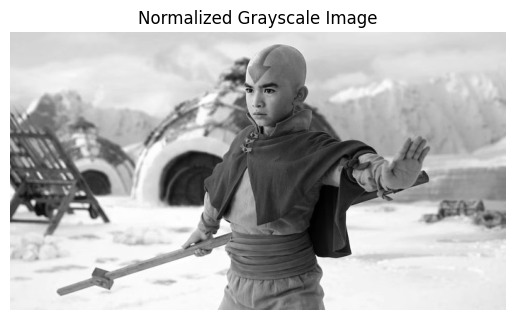

In [14]:
# Normalisasi gambar dari rentang 0-255 ke rentang 0-1
normalized_image = gray_image / 255.0

# Menampilkan gambar hasil normalisasi
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')
plt.title('Normalized Grayscale Image')
plt.show()


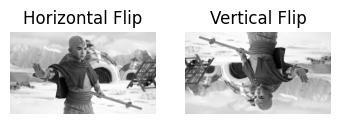

In [15]:
# Transformasi geometri: flip horizontal
flipped_horizontal = cv2.flip(gray_image, 1)
plt.subplot(1, 3, 2)
plt.imshow(flipped_horizontal, cmap='gray')
plt.axis('off')
plt.title('Horizontal Flip')

# Transformasi geometri: flip vertikal
flipped_vertical = cv2.flip(gray_image, 0)
plt.subplot(1, 3, 3)
plt.imshow(flipped_vertical, cmap='gray')
plt.axis('off')
plt.title('Vertical Flip')

plt.show()

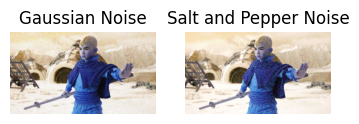

In [17]:
# Menambahkan noise Gaussian
mean = 0
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noisy_image_gaussian = cv2.add(image, gaussian_noise, dtype=cv2.CV_8U)
plt.subplot(1, 3, 2)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.axis('off')
plt.title('Gaussian Noise')

# Menambahkan noise salt and pepper
salt_pepper_ratio = 0.05
salt_and_pepper = np.random.choice([0, 255], size=image.shape, p=[1 - salt_pepper_ratio, salt_pepper_ratio])
noisy_image_salt_pepper = cv2.add(image, salt_and_pepper, dtype=cv2.CV_8U)
plt.subplot(1, 3, 3)
plt.imshow(noisy_image_salt_pepper, cmap='gray')
plt.axis('off')
plt.title('Salt and Pepper Noise')

plt.show()

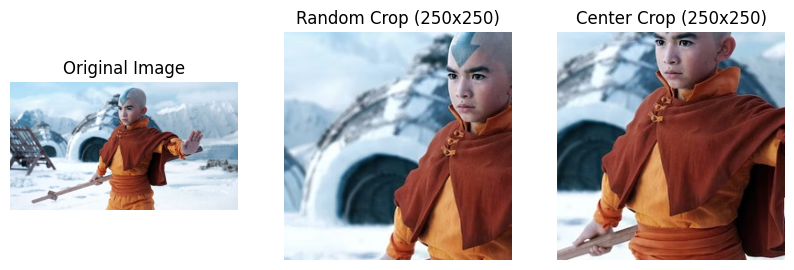

In [18]:
# Fungsi untuk melakukan random crop
def random_crop(image, crop_height, crop_width):
    height, width = image.shape[:2]
    start_h = np.random.randint(0, height - crop_height)
    start_w = np.random.randint(0, width - crop_width)
    return image[start_h:start_h+crop_height, start_w:start_w+crop_width]

# Fungsi untuk melakukan center crop
def center_crop(image, crop_height, crop_width):
    height, width = image.shape[:2]
    start_h = (height - crop_height) // 2
    start_w = (width - crop_width) // 2
    return image[start_h:start_h+crop_height, start_w:start_w+crop_width]

# Random crop
random_cropped_image = random_crop(image, 250, 250)

# Center crop
center_cropped_image = center_crop(image, 250, 250)

# Menampilkan gambar asli dan hasil crop
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(random_cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Random Crop (250x250)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(center_cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Center Crop (250x250)')

plt.show()

# Bagian Baru